# **Overview**
The Google Custom Search API allows us to integrate Google's search capabilities into our applications. By using this API, we can programmatically search the web and retrieve results specifically from the Alloprof website. This document provides a detailed guide on how to utilize the Google Custom Search API with Python to enhance the visibility of Alloprof.


# **Prerequisites**
Before we start using the Google Custom Search API to search Alloprof, we need to ensure the following:

1. Python Environment: We should have Python installed on our machine. We can download it from the official Python website.

2. Requests Library: This library simplifies the process of making HTTP requests. If we haven't installed it yet, we can easily do so through our Python package manager by running: `pip install requests`

3. Google API Key: To access the Google Custom Search API for searching Alloprof, we will need an API key. We can obtain this by following these steps:

    * Go to the Google Cloud Console and create a new project.
    * Navigate to the "APIs & Services" section and enable the Google Custom Search API.
    * In the "Credentials" section, create a new API key.

4. Custom Search Engine ID: Along with the API key, we will also need a Custom Search Engine ID specifically configured to search the Alloprof website. We can create a new search engine by visiting the Custom Search Engine page on Google and ensuring it only searches Alloprof.

# **Understanding the Components**
1. Importing Required Libraries
To interact with the Google Custom Search API for Alloprof, we will import the necessary libraries in our Python script. The primary library used for making requests to the API is called requests.

2. Defining the Search Function
We will create a function to encapsulate the logic for searching the Alloprof website. This function takes a search query as input and returns the search results. It internally constructs the URL for the API request using our API key, the Custom Search Engine ID configured for Alloprof, and the query string.

3. Constructing the API Request URL
The API request URL is constructed using a specific format that includes the API key, the search engine ID, and the search query related to Alloprof. This URL is essential for making requests to the Google Custom Search API.

4. Making the API Call
The next step involves sending a GET request to the constructed URL. This request is executed using the requests library, which handles the communication with the API to retrieve relevant content from Alloprof.

5. Handling the API Response
After making the request, it is crucial to check the response status. If the response indicates success (typically a status code of 200), we will process the returned JSON data, which contains the search results from Alloprof. If there is an error, we will return an appropriate message.

6. Executing the Search
To perform a search on Alloprof, we can specify a query (e.g., "imparfait") and call our search function. This function will then return the results, which we can display or process further.

7. Displaying the Results
The results returned from the API contain various details, including titles, snippets, and links for each search result from Alloprof. We can extract these details and present them in a user-friendly format, ensuring that users can easily find relevant information on Alloprof.

# **Example Use Case**
For instance, if we want to search for the term "imparfait" within the context of Alloprof, we would provide this term to our search function. The function would then retrieve relevant results, such as articles, definitions, and tutorials related to "imparfait" specifically from Alloprof. Each result would include a title, a brief snippet describing the content, and a link to the Alloprof source.

# **Conclusion**
The Google Custom Search API is a powerful tool for integrating web search capabilities into our applications and enhancing the visibility of Alloprof. By following the instructions outlined in this document, we can set up and use the API to retrieve search results programmatically from Alloprof. We should ensure that we handle our API key securely and remain mindful of any usage limits set by Google to avoid unexpected charges.

In this notebook, I tried to establish a connection between the project and the Google search API, and i

# **PS :**
***What is a Snippet?***

Definition: A snippet is a small piece of text that provides a brief overview or summary of a webpage's content.
Purpose: It helps users quickly understand what the webpage is about before they click on the link. Snippets usually include a few lines of text from the page, often highlighting the keywords from the user's search query.
Why Measure Snippet Length?
Information Density:

***The length of a snippet***

(i.e., how many characters or words it contains) can indicate how much information is packed into that summary.
A longer snippet may provide more context and details, helping users gauge the relevance of the page to their query.
User Experience:

Users might prefer snippets that are neither too long (which may overwhelm them) nor too short (which may lack useful information).
By analyzing snippet lengths, web developers and content creators can optimize their content to be more user-friendly.
Comparison:

Comparing the lengths of snippets across different search results can reveal which pages provide more comprehensive information.
It can also help in assessing whether certain sources consistently provide more detailed descriptions.

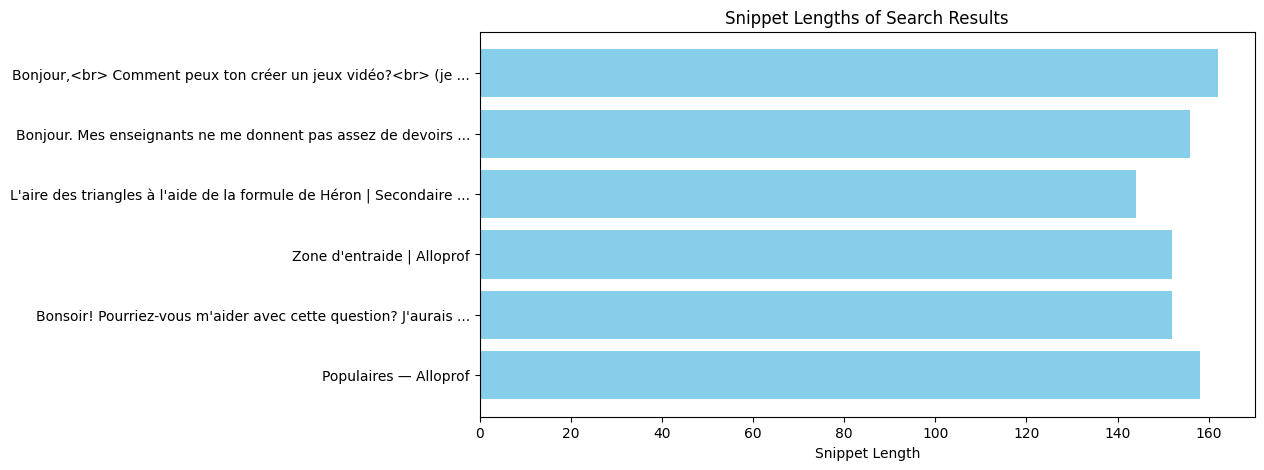

In [6]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

def search_web(query):
    api_key = 'YOUR_API_KEY_HERE'
    search_engine_id = 'PUT_YOUR_ID'
    url = f"https://www.googleapis.com/customsearch/v1?key={api_key}&cx={search_engine_id}&q={query}"

    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        return response.json()  # Return the JSON response
    except requests.exceptions.RequestException as e:
        return {"error": str(e)}

def extract_search_results(data):
    """Extract relevant information from search results."""
    if 'items' in data:
        results = []
        for item in data['items']:
            result = {
                'title': item.get('title'),
                'link': item.get('link'),
                'snippet': item.get('snippet')
            }
            results.append(result)
        return results
    return []

def visualize_results(results):
    """Visualize the number of results using a bar chart."""
    if not results:
        print("No results to visualize.")
        return

    titles = [result['title'] for result in results]
    snippet_lengths = [len(result['snippet']) for result in results]

    # Create a DataFrame for better handling
    df = pd.DataFrame({
        'Title': titles,
        'Snippet Length': snippet_lengths
    })

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.barh(df['Title'], df['Snippet Length'], color='skyblue')
    plt.xlabel('Snippet Length')
    plt.title('Snippet Lengths of Search Results')
    plt.gca().invert_yaxis()  # Invert y-axis to show the longest snippet at the top
    plt.show()

# Example usage
query = "Python programming"
search_results = search_web(query)
results = extract_search_results(search_results)
visualize_results(results)


Title: L'imparfait de l'indicatif | Alloprof
Snippet: L'imparfait de l'indicatif est un temps de verbe simple qui sert à situer un élément de longue durée dans le passé dont la fin n'est pas précisée.
Link: https://www.alloprof.qc.ca/fr/eleves/bv/francais/l-imparfait-de-l-indicatif-f1190

Title: Hi, I am learning about using l'imparfait and passe compose ...
Snippet: Hi! Yes, you used "imparfait" right here. I will point out that we don't say "a apparu", but "est apparu". Other than that, your sentence is well written!
Link: https://www.alloprof.qc.ca/zonedentraide/discussion/32936/question

Title: Le subjonctif imparfait | Secondaire | Alloprof
Snippet: Le subjonctif imparfait est un temps de verbe simple du mode subjonctif exprimant un fait non accompli ayant lieu pendant ou après un autre fait dans un ...
Link: https://www.alloprof.qc.ca/fr/eleves/bv/francais/le-subjonctif-imparfait-f1195

Title: L'imparfait de l'indicatif | Primaire | Alloprof
Snippet: L'imparfait est un temps de c

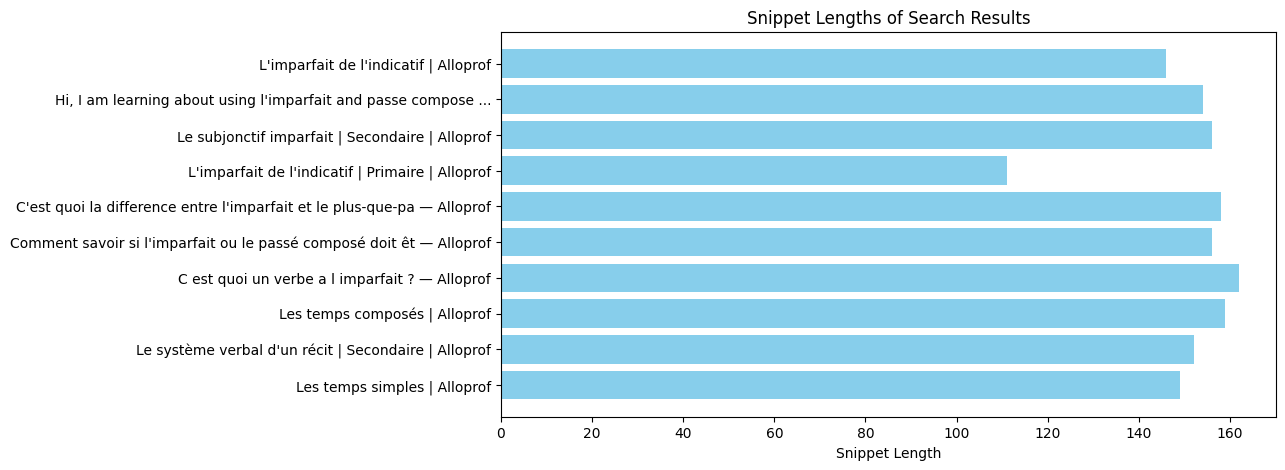

In [7]:
# Example usage
query = "imparfait"
search_results = search_web(query)
results = extract_search_results(search_results)

# Print results
for item in results:
    print(f"Title: {item['title']}")
    print(f"Snippet: {item['snippet']}")
    print(f"Link: {item['link']}\n")

# Visualize results
visualize_results(results)